In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [75]:
df = pd.read_csv("KNN_Project_Data")

In [76]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()

In [79]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
scaler_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [81]:
df_feat=pd.DataFrame(scaler_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(scaler_features,df['TARGET CLASS'],test_size=0.30,random_state=101)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn=KNeighborsClassifier(n_neighbors=39)

In [86]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='uniform')

In [87]:
predict=knn.predict(x_test)


In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(confusion_matrix(y_test,predict))

[[125  27]
 [ 21 127]]


In [90]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [91]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

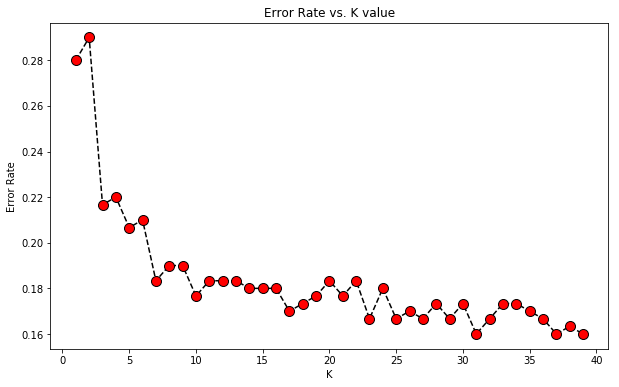

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [93]:
from sklearn.metrics import roc_auc_score,roc_curve

In [94]:
probs=knn.predict_proba(x_test)

In [95]:
probs=probs[:,1]

In [96]:
auc=roc_auc_score(y_test,probs)

In [97]:
auc

0.9004934210526314

In [98]:
fpr,tpr,thersholds=roc_curve(y_test,probs)

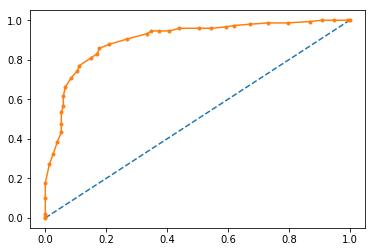

In [99]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [100]:
y_test.mean()

0.49333333333333335

In [101]:
1 - y_test.mean()#calculating the percentage

0.5066666666666666

In [102]:
max(y_test.mean(), 1 - y_test.mean())

0.5066666666666666

In [103]:
min(y_test.mean(), 1- y_test.mean())

0.49333333333333335

In [104]:
y_test.value_counts()

0    152
1    148
Name: TARGET CLASS, dtype: int64

In [105]:
y_test.value_counts().head(1)/len(y_test)

0    0.506667
Name: TARGET CLASS, dtype: float64

In [106]:
print(confusion_matrix(y_test,predict))

[[125  27]
 [ 21 127]]


In [107]:
print('true',y_test.values[0:25])

true [1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1]


In [108]:
print('pred',predict[0:25])

pred [1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1]


In [112]:
confusion = metrics.confusion_matrix(y_test,predict)

In [122]:
print(confusion)

[[125  27]
 [ 21 127]]


In [123]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [124]:
print((TP + TN)/float(TP + TN + FP + FN))

0.84


In [126]:
print(metrics.accuracy_score(y_test,predict))

0.84


In [127]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

In [129]:
print(classification_error)
print(1 - metrics.accuracy_score(y_test,predict))

0.16
0.16000000000000003


In [130]:
sensitivity = TP/float(FN+TP)
print(sensitivity)

0.8581081081081081


In [131]:
specificity = TN/(TN+FP)
print(specificity)

0.8223684210526315


In [132]:
false_positive_rate = FP/float(TN+FP)
print(false_positive_rate)

0.17763157894736842


In [133]:
precision =TP/float(TP+FP)
print(precision)

0.8246753246753247
